In [31]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
%matplotlib inline
sns.set_style("whitegrid")

In [95]:
dataset=pd.read_csv('train.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 23 columns):
S/N           325 non-null int64
Gender        325 non-null object
Age           325 non-null int64
Location      325 non-null object
famsize       325 non-null object
Pstatus       325 non-null object
Medu          325 non-null int64
Fedu          325 non-null int64
traveltime    325 non-null int64
studytime     325 non-null int64
failures      325 non-null int64
schoolsup     325 non-null object
famsup        325 non-null object
paid          325 non-null object
activities    325 non-null object
nursery       325 non-null object
higher        325 non-null object
internet      325 non-null object
famrel        325 non-null int64
freetime      325 non-null int64
health        325 non-null int64
absences      325 non-null int64
Score         325 non-null int64
dtypes: int64(12), object(11)
memory usage: 58.5+ KB


In [97]:
#location famsize schoolsup	famsup	paid	activities	nursery	higher	internet
dataset["Gender_encoded"] = dataset["Gender"]
dataset["Location_Encoded"] = dataset["Location"]
dataset["famsize_encoded"] = dataset["famsize"]
dataset["schoolsup_encoded"]= dataset["schoolsup"]
dataset["Pstatus_Encoded"] = dataset["Pstatus"]
dataset["famsup_encoded"] = dataset["famsup"]
dataset["paid_encoded"] = dataset["paid"]
dataset["activities_encoded"] = dataset["activities"]
dataset["nursery_encoded"] = dataset["nursery"]
dataset["higher_encoded"] = dataset["higher"]
dataset["internet_encoded"] = dataset["internet"]

gender_encoded_value = {"Gender_encoded":{"M" : 1, "F" : 2}}
location_encoded_value={"Location_Encoded":{"U" : 1, "R" : 2}}
famsize_encoded_value = {"famsize_encoded":{"GT3" : 1, "LE3" : 2}}
schoolsup_encoded_value = {"schoolsup_encoded":{"yes" : 1, "no" : 2}}
Pstatus_Encoded_Value = {"Pstatus_Encoded":{"T" : 1, "A" : 2}}
famsup_encoded_value = {"famsup_encoded":{"yes" : 1, "no" : 2}}
paid_encoded_value = {"paid_encoded":{"yes" : 1, "no" : 2}}
activities_encoded_value = {"activities_encoded":{"yes" : 1, "no" : 2}}
nursery_encoded_value = {"nursery_encoded":{"yes" : 1, "no" : 2}}
higher_encoded_value = {"higher_encoded":{"yes" : 1, "no" : 2}}
internet_encoded_value = {"internet_encoded":{"yes" : 1, "no" : 2}}

dataset.replace(gender_encoded_value, inplace=True)
dataset.replace(location_encoded_value, inplace=True)
dataset.replace(famsize_encoded_value, inplace=True)
dataset.replace(Pstatus_Encoded_Value, inplace=True)
dataset.replace(schoolsup_encoded_value, inplace=True)
dataset.replace(famsup_encoded_value, inplace=True)
dataset.replace(paid_encoded_value, inplace=True)
dataset.replace(activities_encoded_value, inplace=True)
dataset.replace(nursery_encoded_value, inplace=True)
dataset.replace(higher_encoded_value, inplace=True)
dataset.replace(internet_encoded_value, inplace=True)



In [116]:
dataset = dataset.drop(["famsup"], axis=1)

In [117]:
dataset

,Age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,absences,...,Location_Encoded,famsize_encoded,schoolsup_encoded,Pstatus_Encoded,famsup_encoded,paid_encoded,activities_encoded,nursery_encoded,higher_encoded,internet_encoded
0,13,4,4,2,2,0,4,3,3,4,...,1,1,1,2,2,2,2,1,1,2
1,12,1,1,1,2,0,5,3,3,2,...,1,1,2,1,1,2,2,2,1,1
2,10,1,1,1,2,0,4,3,3,6,...,1,2,1,1,2,2,2,1,1,1
3,10,4,2,1,3,0,3,2,5,0,...,1,1,2,1,1,2,1,1,1,1
4,11,3,3,1,2,0,4,3,5,0,...,1,1,2,1,1,2,2,1,1,2
5,11,4,3,1,2,0,5,4,5,6,...,1,2,2,1,1,2,1,1,1,1
6,11,2,2,1,2,0,4,4,3,0,...,1,2,2,1,2,2,2,1,1,1
7,12,4,4,2,2,0,4,1,1,2,...,1,1,1,2,1,2,2,1,1,2
8,10,3,2,1,2,0,4,2,1,0,...,1,2,2,2,1,2,2,1,1,1
9,10,3,4,1,2,0,5,5,5,0,...,1,1,2,1,1,2,1,1,1,1


In [99]:
dataset_filtered = dataset[dataset["absences"] < 15]

In [100]:
testset = pd.read_csv("test.csv")

In [108]:
#location famsize schoolsup	famsup	paid	activities	nursery	higher	internet
testset["Location_Encoded"] = testset["Location"]
testset["famsize_encoded"] = testset["famsize"]
testset["schoolsup_encoded"]= testset["schoolsup"]
testset["Pstatus_Encoded"] = testset["Pstatus"]
testset["famsup_encoded"] = testset["famsup"]
testset["paid_encoded"] = testset["paid"]
testset["activities_encoded"] = testset["activities"]
testset["nursery_encoded"] = testset["nursery"]
testset["higher_encoded"] = testset["higher"]
testset["internet_encoded"] = testset["internet"]

location_encoded_value={"Location_Encoded":{"U" : 1, "R" : 2}}
famsize_encoded_value = {"famsize_encoded":{"GT3" : 1, "LE3" : 2}}
schoolsup_encoded_value = {"schoolsup_encoded":{"yes" : 1, "no" : 2}}
Pstatus_Encoded_Value = {"Pstatus_Encoded":{"T" : 1, "A" : 2}}
famsup_encoded_value = {"famsup_encoded":{"yes" : 1, "no" : 2}}
paid_encoded_value = {"paid_encoded":{"yes" : 1, "no" : 2}}
activities_encoded_value = {"activities_encoded":{"yes" : 1, "no" : 2}}
nursery_encoded_value = {"nursery_encoded":{"yes" : 1, "no" : 2}}
higher_encoded_value = {"higher_encoded":{"yes" : 1, "no" : 2}}
internet_encoded_value = {"internet_encoded":{"yes" : 1, "no" : 2}}

testset.replace(location_encoded_value, inplace=True)
testset.replace(famsize_encoded_value, inplace=True)
testset.replace(Pstatus_Encoded_Value, inplace=True)
testset.replace(schoolsup_encoded_value, inplace=True)
testset.replace(famsup_encoded_value, inplace=True)
testset.replace(paid_encoded_value, inplace=True)
testset.replace(activities_encoded_value, inplace=True)
testset.replace(nursery_encoded_value, inplace=True)
testset.replace(higher_encoded_value, inplace=True)
testset.replace(internet_encoded_value, inplace=True)


In [114]:
testset = testset.drop(["famsup"], axis=1)

In [120]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 20 columns):
Age                   323 non-null int64
Medu                  323 non-null int64
Fedu                  323 non-null int64
traveltime            323 non-null int64
studytime             323 non-null int64
failures              323 non-null int64
famrel                323 non-null int64
freetime              323 non-null int64
health                323 non-null int64
absences              323 non-null int64
Location_Encoded      323 non-null int64
famsize_encoded       323 non-null int64
schoolsup_encoded     323 non-null int64
Pstatus_Encoded       323 non-null int64
famsup_encoded        323 non-null int64
paid_encoded          323 non-null int64
activities_encoded    323 non-null int64
nursery_encoded       323 non-null int64
higher_encoded        323 non-null int64
internet_encoded      323 non-null int64
dtypes: int64(20)
memory usage: 50.5 KB


In [121]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 22 columns):
Age                   325 non-null int64
Medu                  325 non-null int64
Fedu                  325 non-null int64
traveltime            325 non-null int64
studytime             325 non-null int64
failures              325 non-null int64
famrel                325 non-null int64
freetime              325 non-null int64
health                325 non-null int64
absences              325 non-null int64
Score                 325 non-null int64
Gender_encoded        325 non-null int64
Location_Encoded      325 non-null int64
famsize_encoded       325 non-null int64
schoolsup_encoded     325 non-null int64
Pstatus_Encoded       325 non-null int64
famsup_encoded        325 non-null int64
paid_encoded          325 non-null int64
activities_encoded    325 non-null int64
nursery_encoded       325 non-null int64
higher_encoded        325 non-null int64
internet_encoded      325 non-null

In [122]:
dataset = dataset.drop(["Gender_encoded"], axis=1)

In [123]:
target = dataset.filter(["score"])


,Age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,absences,...,Location_Encoded,famsize_encoded,schoolsup_encoded,Pstatus_Encoded,famsup_encoded,paid_encoded,activities_encoded,nursery_encoded,higher_encoded,internet_encoded
0,13,4,4,2,2,0,4,3,3,4,...,1,1,1,2,2,2,2,1,1,2
1,12,1,1,1,2,0,5,3,3,2,...,1,1,2,1,1,2,2,2,1,1
2,10,1,1,1,2,0,4,3,3,6,...,1,2,1,1,2,2,2,1,1,1
3,10,4,2,1,3,0,3,2,5,0,...,1,1,2,1,1,2,1,1,1,1
4,11,3,3,1,2,0,4,3,5,0,...,1,1,2,1,1,2,2,1,1,2
5,11,4,3,1,2,0,5,4,5,6,...,1,2,2,1,1,2,1,1,1,1
6,11,2,2,1,2,0,4,4,3,0,...,1,2,2,1,2,2,2,1,1,1
7,12,4,4,2,2,0,4,1,1,2,...,1,1,1,2,1,2,2,1,1,2
8,10,3,2,1,2,0,4,2,1,0,...,1,2,2,2,1,2,2,1,1,1
9,10,3,4,1,2,0,5,5,5,0,...,1,1,2,1,1,2,1,1,1,1


In [124]:
testset

,Age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,absences,Location_Encoded,famsize_encoded,schoolsup_encoded,Pstatus_Encoded,famsup_encoded,paid_encoded,activities_encoded,nursery_encoded,higher_encoded,internet_encoded
0,12,3,2,1,1,0,4,4,3,18,1,2,2,2,2,2,2,1,1,1
1,13,1,1,2,4,0,5,2,3,2,2,2,2,1,1,2,1,1,1,2
2,13,1,1,2,2,0,5,4,4,0,1,1,1,1,2,2,1,1,1,1
3,12,2,2,1,2,0,5,4,5,12,1,1,2,1,1,2,2,2,1,1
4,13,2,1,2,2,0,4,3,5,10,1,1,2,1,2,2,1,1,1,1
5,12,1,1,1,2,0,4,3,4,0,1,1,2,1,2,2,2,2,1,1
6,13,2,2,1,3,0,4,3,2,0,1,1,2,1,1,2,2,1,1,1
7,12,1,1,1,3,0,4,3,3,0,1,1,2,1,1,2,2,1,1,1
8,13,2,1,1,3,0,4,2,2,0,1,1,2,1,2,2,1,1,1,1
9,13,4,4,1,2,0,5,4,2,0,1,2,2,2,1,2,1,1,1,1


In [125]:
dataset_filter = dataset[dataset["absences"] < 15]

In [135]:
train = dataset_filter.drop(["Score"], axis=1)

In [165]:
train
dataset_filter

,Age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,absences,...,Location_Encoded,famsize_encoded,schoolsup_encoded,Pstatus_Encoded,famsup_encoded,paid_encoded,activities_encoded,nursery_encoded,higher_encoded,internet_encoded
0,13,4,4,2,2,0,4,3,3,4,...,1,1,1,2,2,2,2,1,1,2
1,12,1,1,1,2,0,5,3,3,2,...,1,1,2,1,1,2,2,2,1,1
2,10,1,1,1,2,0,4,3,3,6,...,1,2,1,1,2,2,2,1,1,1
3,10,4,2,1,3,0,3,2,5,0,...,1,1,2,1,1,2,1,1,1,1
4,11,3,3,1,2,0,4,3,5,0,...,1,1,2,1,1,2,2,1,1,2
5,11,4,3,1,2,0,5,4,5,6,...,1,2,2,1,1,2,1,1,1,1
6,11,2,2,1,2,0,4,4,3,0,...,1,2,2,1,2,2,2,1,1,1
7,12,4,4,2,2,0,4,1,1,2,...,1,1,1,2,1,2,2,1,1,2
8,10,3,2,1,2,0,4,2,1,0,...,1,2,2,2,1,2,2,1,1,1
9,10,3,4,1,2,0,5,5,5,0,...,1,1,2,1,1,2,1,1,1,1


In [137]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, n_jobs=-1)
model.fit(train, target)
predictions = np.array()

/Users/thetaeo/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [163]:
random_predictions = np.array(model.predict(testset))
random_predictions
#for test in random_predictions:
#    print test

array([ 40.67,  38.68,  33.26,  35.76,  35.2 ,  36.12,  38.41,  35.48,
        41.11,  40.78,  35.76,  39.85,  36.52,  34.78,  35.4 ,  38.25,
        39.27,  35.6 ,  39.13,  35.95,  35.96,  37.54,  38.17,  38.35,
        29.62,  24.88,  37.08,  32.33,  40.15,  39.61,  36.86,  35.92,
        36.82,  37.92,  34.68,  39.62,  35.27,  41.37,  39.  ,  37.55,
        36.  ,  40.77,  34.98,  29.36,  29.49,  33.56,  36.12,  36.5 ,
        35.34,  36.12,  39.74,  37.89,  34.97,  35.23,  41.35,  36.02,
        33.92,  37.22,  33.75,  39.74,  35.67,  36.  ,  35.19,  38.15,
        35.27,  36.79,  39.91,  40.71,  39.61,  39.63,  37.5 ,  36.43,
        34.11,  40.62,  32.71,  34.42,  38.56,  40.61,  35.59,  25.32,
        26.16,  31.21,  30.37,  39.58,  36.9 ,  37.14,  39.69,  27.12,
        33.93,  32.62,  34.51,  38.79,  35.64,  37.86,  34.61,  28.3 ,
        41.73,  30.  ,  34.57,  29.73,  33.73,  35.02,  30.2 ,  38.36,
        34.39,  24.34,  27.73,  35.97,  33.27,  36.74,  28.3 ,  33.48,
      

In [154]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [164]:
lin_reg.predict(testset)

array([[ 34.27455473],
       [ 38.35397501],
       [ 32.94612857],
       [ 34.50594947],
       [ 35.31566721],
       [ 35.54759857],
       [ 39.01864994],
       [ 38.05410438],
       [ 40.16682841],
       [ 41.05182871],
       [ 38.66388462],
       [ 39.32208722],
       [ 37.64979407],
       [ 37.3468744 ],
       [ 36.1752382 ],
       [ 40.52733866],
       [ 38.31129078],
       [ 39.50011875],
       [ 39.65784236],
       [ 35.86213413],
       [ 35.15010669],
       [ 37.58366636],
       [ 38.43109141],
       [ 39.67042401],
       [ 32.30653651],
       [ 30.99871523],
       [ 36.1832116 ],
       [ 32.22170756],
       [ 40.27289283],
       [ 38.4094662 ],
       [ 35.97004166],
       [ 39.30129492],
       [ 37.92685102],
       [ 37.58380288],
       [ 37.3933242 ],
       [ 39.81318722],
       [ 36.88741454],
       [ 40.70503573],
       [ 37.50998781],
       [ 35.38150053],
       [ 32.68648646],
       [ 39.50132341],
       [ 36.2088535 ],
       [ 29

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [149]:
lin_reg.predict(train)

array([[ 32.99055481],
       [ 36.96065046],
       [ 32.33510168],
       [ 40.35926356],
       [ 37.50342643],
       [ 38.41430525],
       [ 36.96000099],
       [ 36.23102198],
       [ 40.20966219],
       [ 39.19676497],
       [ 39.91051786],
       [ 38.85762657],
       [ 39.17618014],
       [ 38.27180601],
       [ 38.66525471],
       [ 38.44734294],
       [ 41.47413137],
       [ 34.89954705],
       [ 27.38467301],
       [ 37.4528626 ],
       [ 39.62298746],
       [ 35.13318379],
       [ 38.04052835],
       [ 37.49483712],
       [ 34.13905901],
       [ 35.58404387],
       [ 35.48473295],
       [ 39.41935789],
       [ 33.08710618],
       [ 37.17273064],
       [ 35.4395437 ],
       [ 38.92728286],
       [ 37.96954499],
       [ 40.31206422],
       [ 35.49318165],
       [ 37.75944595],
       [ 40.68105263],
       [ 37.47988828],
       [ 34.45062337],
       [ 34.93008893],
       [ 35.645968  ],
       [ 39.83709083],
       [ 35.41070552],
       [ 28

In [75]:
#dataset.replace(gender_encoded_value, inplace=True)
dataset_filter = dataset_filter[dataset_filter["absences"] < 15]
corr_matrix = dataset_filter.corr()
corr_matrix

,S/N,Age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,...,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes
S/N,1.000000,0.663151,-0.218800,-0.192075,0.092946,-0.040617,0.064186,-0.067575,-0.073257,-0.077406,...,0.074897,-0.074897,0.046373,-0.046373,0.135978,-0.135978,0.213313,-0.213313,0.031647,-0.031647
Age,0.663151,1.000000,-0.144369,-0.207530,0.049450,-0.062607,0.305843,-0.056824,-0.068974,-0.040119,...,0.033438,-0.033438,0.065901,-0.065901,0.101434,-0.101434,0.373880,-0.373880,0.063029,-0.063029
Medu,-0.218800,-0.144369,1.000000,0.624222,-0.215384,0.095414,-0.206277,0.010940,0.035704,-0.020090,...,-0.118700,0.118700,-0.183688,0.183688,-0.229940,0.229940,-0.199633,0.199633,-0.198174,0.198174
Fedu,-0.192075,-0.207530,0.624222,1.000000,-0.171103,-0.000974,-0.191884,0.035023,0.030897,0.022920,...,-0.108000,0.108000,-0.113554,0.113554,-0.129678,0.129678,-0.233335,0.233335,-0.123183,0.123183
traveltime,0.092946,0.049450,-0.215384,-0.171103,1.000000,-0.093393,0.082211,0.021375,-0.016699,-0.043384,...,0.043077,-0.043077,-0.016364,0.016364,0.013510,-0.013510,0.086531,-0.086531,0.113422,-0.113422
studytime,-0.040617,-0.062607,0.095414,-0.000974,-0.093393,1.000000,-0.210720,-0.024272,-0.132473,-0.079952,...,0.022569,-0.022569,-0.128206,0.128206,-0.080442,0.080442,-0.224605,0.224605,-0.117197,0.117197
failures,0.064186,0.305843,-0.206277,-0.191884,0.082211,-0.210720,1.000000,-0.017202,0.105918,0.055193,...,-0.091651,0.091651,0.056734,-0.056734,0.100073,-0.100073,0.405606,-0.405606,0.068756,-0.068756
famrel,-0.067575,-0.056824,0.010940,0.035023,0.021375,-0.024272,-0.017202,1.000000,0.156236,0.155059,...,-0.050965,0.050965,-0.082044,0.082044,0.015908,-0.015908,-0.042945,0.042945,-0.016824,0.016824
freetime,-0.073257,-0.068974,0.035704,0.030897,-0.016699,-0.132473,0.105918,0.156236,1.000000,0.112325,...,0.035868,-0.035868,-0.108082,0.108082,0.004311,-0.004311,0.032973,-0.032973,-0.068182,0.068182
health,-0.077406,-0.040119,-0.020090,0.022920,-0.043384,-0.079952,0.055193,0.155059,0.112325,1.000000,...,-0.071922,0.071922,-0.029119,0.029119,-0.038402,0.038402,0.017630,-0.017630,0.006871,-0.006871


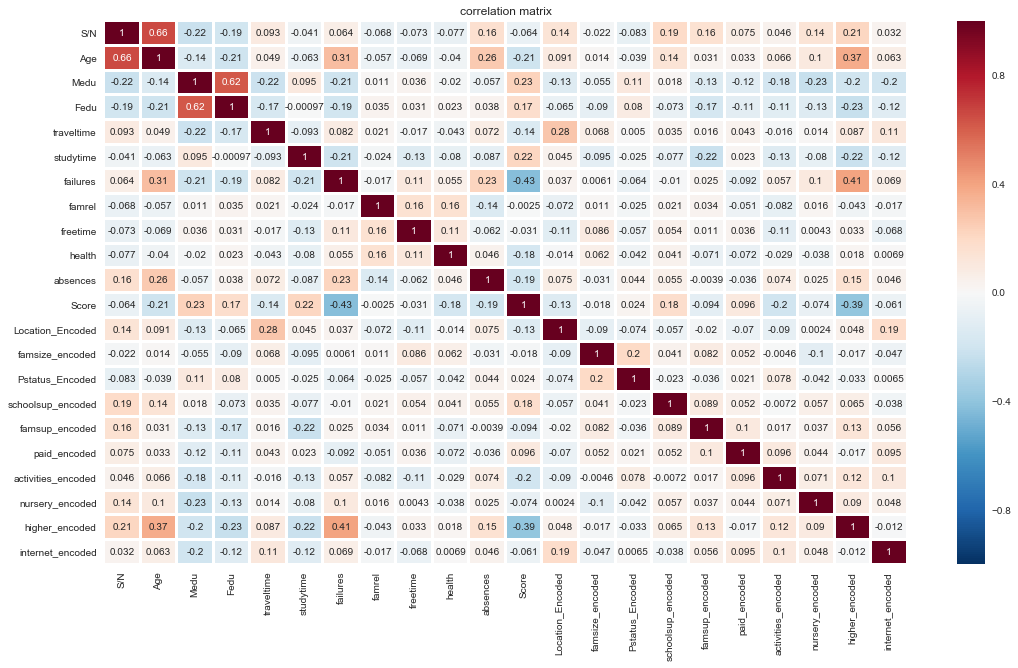

In [54]:
f, ax = plt.subplots(figsize=(18,10))
sns.heatmap(corr_filtered_matrix, linewidths=2.0, ax=ax, annot=True)
ax.set_title("correlation matrix")

ValueError: labels ['Gender' 'Location' 'Pstatus' 'famsize' 'schoolsup' 'famsup' 'paid'
 'activities' 'nursery' 'higher' 'internet'] not contained in axis

In [2]:
from sklearn.ensemble import RandomForestRegressor
train = dataset_filter.drop(["S/N"], axis=1)
target = dataset_filter.filter(['Score'])
model = RandomForestRegressor(n_estimators=100, n_jobs=-1)
model.fit(train, target)

predictions = np.array(model.predict(train))

In [82]:
train = dataset_filter.drop(["S/N"], axis=1)
target = dataset_filter.filter(['Score'])

In [83]:
model = RandomForestRegressor(n_estimators=100, n_jobs=-1)
model.fit(train, target)

predictions = np.array(model.predict(train))

/Users/thetaeo/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [84]:
predictions


array([ 21.89,  31.  ,  37.  ,  42.  ,  37.  ,  37.  ,  38.  ,  36.  ,
        48.07,  37.  ,  42.  ,  35.  ,  37.  ,  37.  ,  42.99,  51.13,
        40.01,  41.  ,  23.06,  36.  ,  39.  ,  35.  ,  39.  ,  30.  ,
        31.  ,  33.  ,  35.  ,  33.  ,  37.  ,  35.  ,  32.  ,  45.  ,
        42.  ,  37.  ,  36.  ,  33.  ,  42.  ,  39.  ,  35.  ,  39.  ,
        32.  ,  44.  ,  29.  ,  32.  ,  32.  ,  38.  ,  51.22,  36.  ,
        37.  ,  40.  ,  45.96,  28.  ,  37.  ,  38.  ,  37.  ,  44.  ,
        45.95,  40.99,  47.01,  48.87,  36.  ,  36.  ,  40.  ,  37.  ,
        47.  ,  35.  ,  29.  ,  32.  ,  45.02,  35.  ,  30.  ,  35.  ,
        40.  ,  33.  ,  33.  ,  34.  ,  39.  ,  28.  ,  34.  ,  34.  ,
        28.  ,  34.  ,  38.  ,  37.  ,  35.  ,  35.  ,  45.  ,  33.  ,
        28.  ,  31.  ,  40.01,  37.  ,  41.  ,  35.  ,  39.  ,  31.  ,
        37.  ,  38.  ,  38.  ,  25.83,  48.12,  37.  ,  48.06,  30.  ,
        30.  ,  41.  ,  33.  ,  44.  ,  41.  ,  33.  ,  28.  ,  52.53,
      

In [85]:
test = pd.read_csv("test.csv")

In [86]:
test_target = test.drop(["S/N"], axis=1)

In [87]:
pd.get_dummies(test_target)

,Age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,absences,...,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes
0,12,3,2,1,1,0,4,4,3,18,...,1,0,1,0,0,1,0,1,0,1
1,13,1,1,2,4,0,5,2,3,2,...,1,0,0,1,0,1,0,1,1,0
2,13,1,1,2,2,0,5,4,4,0,...,1,0,0,1,0,1,0,1,0,1
3,12,2,2,1,2,0,5,4,5,12,...,1,0,1,0,1,0,0,1,0,1
4,13,2,1,2,2,0,4,3,5,10,...,1,0,0,1,0,1,0,1,0,1
5,12,1,1,1,2,0,4,3,4,0,...,1,0,1,0,1,0,0,1,0,1
6,13,2,2,1,3,0,4,3,2,0,...,1,0,1,0,0,1,0,1,0,1
7,12,1,1,1,3,0,4,3,3,0,...,1,0,1,0,0,1,0,1,0,1
8,13,2,1,1,3,0,4,2,2,0,...,1,0,0,1,0,1,0,1,0,1
9,13,4,4,1,2,0,5,4,2,0,...,1,0,0,1,0,1,0,1,0,1


In [88]:
test_target=pd.get_dummies(test_target)

In [89]:
predictions = np.array(model.predict(test_target))

ValueError: Number of features of the model must match the input. Model n_features is 44 and input n_features is 30 